Start: (-1.25, 0, -3)  (BLUE marker)
Goal: (1.25, 0, 3)
It takes 8 steps to find a path using A*
[[[-1.25, 0, -3], 'Start'], [[-1.25, 0, -2], 'UP'], [[-1.25, 0, -1], 'UP'], [[-1.25, 0, 0], 'UP'], [[-1.25, 0, 1], 'UP'], [[-1.25, 0, 2], 'UP'], [[-1.25, 0, 3], 'UP'], [[0.0, -1.25, 3.0], 'CW'], [[1.25, 0.0, 3.0], 'CW']]


<IPython.core.display.Javascript object>


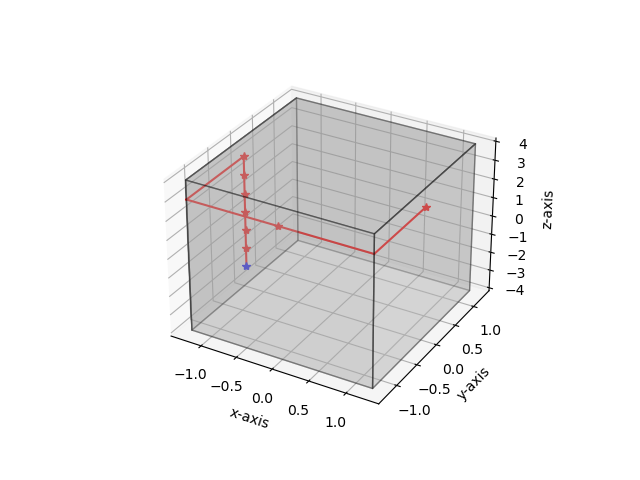

In [90]:
import math
import numpy as np

class Node:

	def __init__(self, x, y, z):
		# self.start = start
		# self.goal = goal
		self.x = x
		self.y = y
		self.z = z
		self.g = None
		self.h = None
		self.cost = None
		self.parent = None
		self.step = None

def rot_point(point, direction):
	if direction == "CW":
		theta = np.pi/2
	if direction == "CCW":
		theta = -np.pi/2
	rot_mat = np.array([[round(math.cos(theta), 2), round(-math.sin(theta), 2), 0],
						[round(math.sin(theta), 2), round(math.cos(theta), 2), 0],
						[0, 0, 1]])
	return tuple(rot_mat.dot(point))

# def rot_dir(normal, direction):
# 	key = (normal, direction)
# 	hashmap = {
# 		((-1, 0, 0), "CW"): (0, -1, 0),
# 		((0, -1, 0), "CW"): (1, 0, 0),
# 		((1, 0, 0), "CW"): (0, 1, 0),
# 		((0, 1, 0), "CW"): (-1, 0, 0),
# 		((-1, 0, 0), "CCW"): (0, 1, 0),
# 		((0, 1, 0), "CCW"): (-1, 0, 0),
# 		((-1, 0, 0), "CCW"): (0, -1, 0),
# 		((0, -1, 0), "CCW"): (1, 0, 0),
# 		}
# 		# can also be calculated with cross product
# 		return hashmap[key]

def _neighbour(x, y, z):
    directions = ["UP", "DOWN", "CW", "CCW"]
    n_list = []

  #   for d in directions:
  #   	if d == "UP":
  #   		if z+1 < 4:
  #   			n_list.append((d,(x, y, z+1)))
		# if d == "DOWN":
		# 	if z-1 > -4:
		# 		n_list.append((d,(x, y, z-1)))
  #       if d == "CW":
		# 	n_list.append((d,(rot_point((x, y, z),d))))
		# if d == "CCW":
		# 	n_list.append((d,(rot_point((x, y, z),d))))

  #   #n_list.reverse()
  #   return n_list

    for d in directions:
    	if d =="UP":
    		if z+1 <4:
    			n_list.append((d, (x, y, z+1)))
    	if d =="DOWN":
    		if z-1 >-4:
    			n_list.append((d, (x, y, z-1)))
    	if d == "CW":
    		n_list.append((d, (rot_point((x, y, z),d))))
    	if d == "CCW":
    		n_list.append((d, (rot_point((x, y, z),d))))
    return n_list


def gcost(action):
	if action == "UP" or action == "DOWN":
		return 1.00
	if action == "CW" or action == "CCW":
		return 2.5

def astar(start, goal):
	found = False
	visit = set()
	q = []
	steps = 0
	path = []
	if start == goal:
		return path, steps
	s_node = Node(start[0], start[1], start[2])
	s_node.parent = None
	visit.add(start)
	s_node.g = 0
	# print(visit)
	while not found:
		x, y, z = s_node.x, s_node.y, s_node.z
		if (x, y, z) == goal:
			found = True
			# visit.add((row, col))

			break
		else:
			for node in _neighbour(x, y, z):
				# print(node[0])
				if node not in visit:
					# print(node[1])
					h = np.sqrt((node[1][0] - goal[0])**2 +  (node[1][1] - goal[1])**2 + (node[1][2] - goal[2])**2)
					temp_object = Node(node[1][0], node[1][1], node[1][2])
					temp_object.h = h
					temp_object.parent = s_node
					temp_object.g = s_node.g + gcost(node[0])
					temp_object.cost = temp_object.g + temp_object.h
					temp_object.step = node[0]
					q.append((temp_object, temp_object.cost))
			q.sort(key=lambda x: x[1])
			# print([[e[0].row, e[0].col] for e in q])
			priority_ = q.pop(0)
			s_node = priority_[0]
			visit.add((s_node.x, s_node.y, s_node.z))
	# print(visit)
	steps = len(visit)
	while s_node.parent is not None:
		path.append([[s_node.x, s_node.y, s_node.z],s_node.step])
		s_node = s_node.parent
	path.append([list(start), "Start"])
	path.reverse()

	if found:
		print(f"It takes {(len(path))-1} steps to find a path using A*")
	else:
		print("No path found")
	return path

####_____________________________________________________________________________________________


if __name__ == "__main__":
	start = (-1.25, 0, -3)
	goal = (1.25, 0, 3)
	print("Start:", start, " (BLUE marker)")
	print("Goal:", goal)
	path = astar(start, goal)
	print(path)
    
####_____________________________________________________________________________________________
    
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def cuboid_data(o, size=(1,1,1)):
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1], o[1], o[1]],          
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]   
    z = [[o[2], o[2], o[2], o[2], o[2]],                       
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],   
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],               
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]               
    return np.array(x), np.array(y), np.array(z)

def plotCubeAt(pos=(0,0,0), size=(1,1,1), ax=None,**kwargs):
    # Plotting a cube element at position pos
    if ax !=None:
        X, Y, Z = cuboid_data( pos, size )
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, **kwargs)

positions = [(-1.25,-1.25,-4)]
sizes = [(2.5,2.5,8)]
colors = ["white"]

fig = plt.figure()

ax = fig.gca(projection='3d')
ax.set_aspect('auto')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

for p,s,c in zip(positions,sizes,colors):
    plotCubeAt(pos=p, size=s, ax=ax, color=c, alpha = 0.2, ec='k')

for i in range(len(path)):
    if i<len(path)-1:
        x1,y1,z1 = path[i][0]
        x2,y2,z2 = path[i+1][0]
        plt.plot(x2,y2,z2,'r*')
        if path[i+1][1] == 'UP':
            plt.plot([x1, x2], [y1, y2], [z1, z2], marker = '', color='r')
        if path[i+1][1] == 'DOWN':
            plt.plot([x1, x2], [y1, y2], [z1, z2], marker = '', color='r')
        
        if path[i+1][1] == 'CW':
            x3, y3, z3 = x2+x1, y1+y2, z1
#             print(x1, y1, z1)
#             print(x2, y2, z2)
#             print(x3, y3, z3)
            plt.plot([x1, x3], [y1, y3], [z1, z3], marker = '', color='r')
            plt.plot([x3, x2], [y3, y2], [z3, z2], marker = '', color='r')
        
        if path[i+1][1] == 'CCW':
            x3, y3, z3 = x2+x1, y1+y2, z1
#             print(x1, y1, z1)
#             print(x2, y2, z2)
#             print(x3, y3, z3)
            plt.plot([x1, x3], [y1, y3], [z1, z3], marker = '', color='r')
            plt.plot([x3, x2], [y3, y2], [z3, z2], marker = '', color='r')  

x,y,z = start
plt.plot(x,y,z,'b*')

# x,y,z = goal
# plt.plot(x,y,z,'r*')

plt.show()